In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('PetFinder_dataset.csv')

In [23]:
df.iloc[:2]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [25]:
df.set_index('PetID', inplace=True) # change index to PetId
# raw_dataset.reset_index # revert index to serial numbers
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2


In [26]:
# for column_name in [ 'Type' , 'Breed1' , 'Breed2' , 'Gender' , 'Color1' ,
  #                    'Color2' , 'Color3' , 'MaturitySize' , 'FurLength' , 'Vaccinated' ,
  #                    'Dewormed' ,'Sterilized' , 'Health' , 'State' , 'AdoptionSpeed']:
    # raw_dataset[column_name] = raw_dataset[column_name].astype('category')

# raw_dataset['PhotoAmt'] = raw_dataset['PhotoAmt'].astype('int64')    

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 23 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null int64
dtype

In [27]:
ds_no_str = df
ds_no_str.drop(['Name','RescuerID','Description','State'], axis = 1)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,
86e1089a3,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,0,1.0,2
6296e909a,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0,2.0,0
3422e4906,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,0,7.0,3
5842f1ff5,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,0,8.0,2
850a43f90,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc0935a84,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,0,3.0,2
a01ab5b30,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,0,3.0,4
d981b6395,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,0,5.0,3


In [97]:
# creates a stacked bar plot for any two categorical variables
# also creates a relative frequency version of the same plot
def cat_distr_pairwise(cat_x,cat_y, df):
    """"""
    unique_cat_y = sorted(df[cat_y].unique())
    unique_cat_x = sorted(df[cat_x].unique())
    cat_count = pd.DataFrame(columns=unique_cat_y,index=unique_cat_x)
    for y in unique_cat_y:
        for x in unique_cat_x:
            count = df[cat_y][(df[cat_x]==x) & (df[cat_y]==y)].count()
            cat_count.at[x,y] = count  
    cat_count.plot.bar(stacked=True, figsize=(10,7))
    
    #relative frequency stacked bar plot
    freq_cat_count = cat_count.divide(cat_count.sum(axis=1), axis=0)
    
    #print(freq_cat_count)
    freq_cat_count.plot.bar(stacked=True, figsize=(10,7))
    
    return cat_count

### Gender

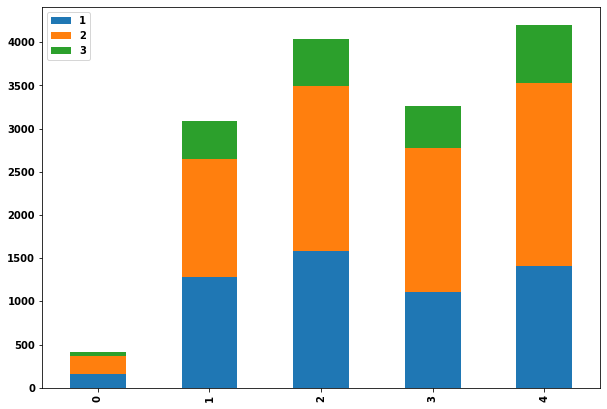

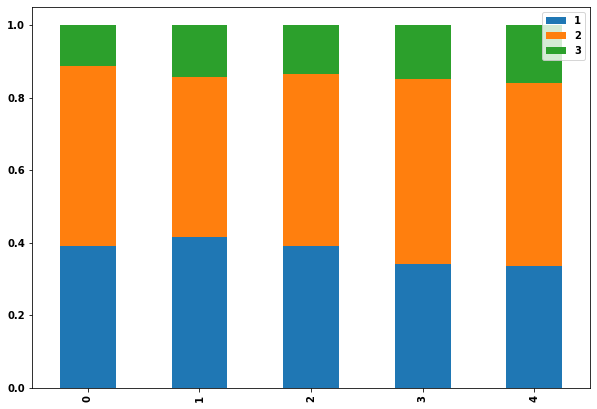

In [101]:
# unique Gender categories
gender_cat = cat_distr_pairwise('AdoptionSpeed','Gender', df)
# print("The unique categories for 'Gender' are:\n",gender_cat)

# y-axis in bold
plt.rc('font', weight='bold')

### Color1

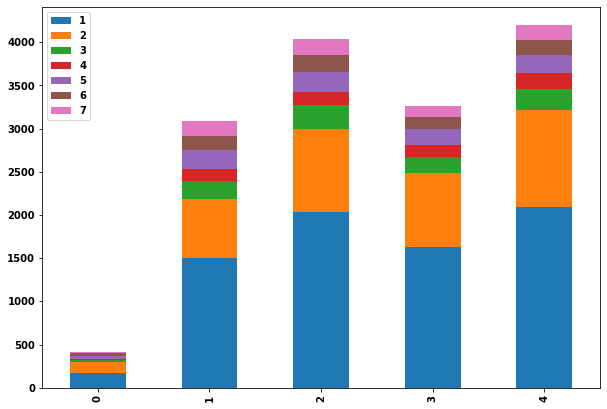

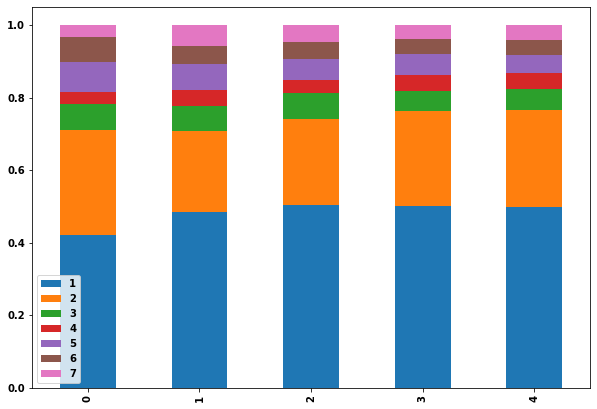

In [99]:
# COLOR1

# unique Color1 categories
color1_cat = cat_distr_pairwise('AdoptionSpeed','Color1', df)
# print("The unique categories for 'Color1' are:\n",color1_cat)

# y-axis in bold
plt.rc('font', weight='bold')

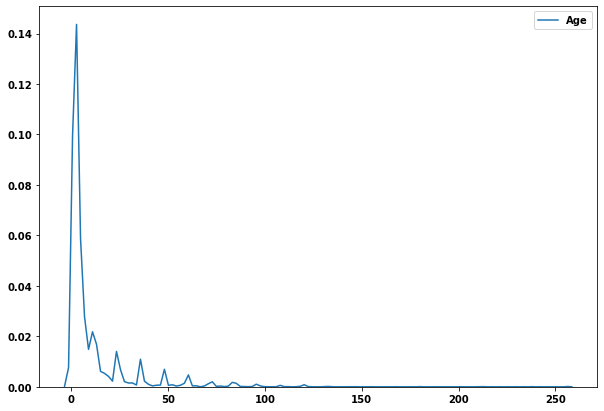

In [103]:
# AGE

plt.figure(figsize=(10,7))
# Make default density plot
sns.kdeplot(df['Age'])
#sns.plt.show()

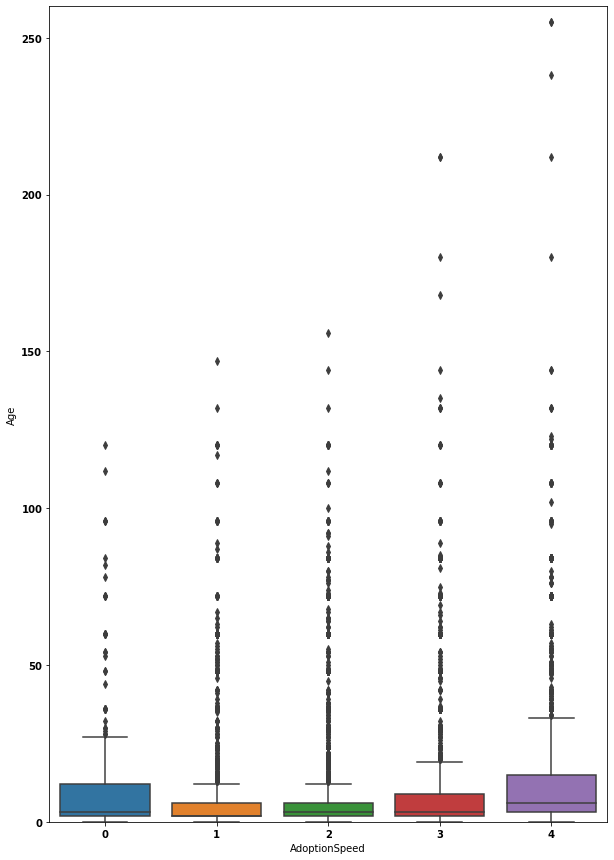

In [113]:
# AGE

plt.figure(figsize=(10,15))
plt.ylim(0, 260)
sns.boxplot(data = df, x='AdoptionSpeed', y='Age')

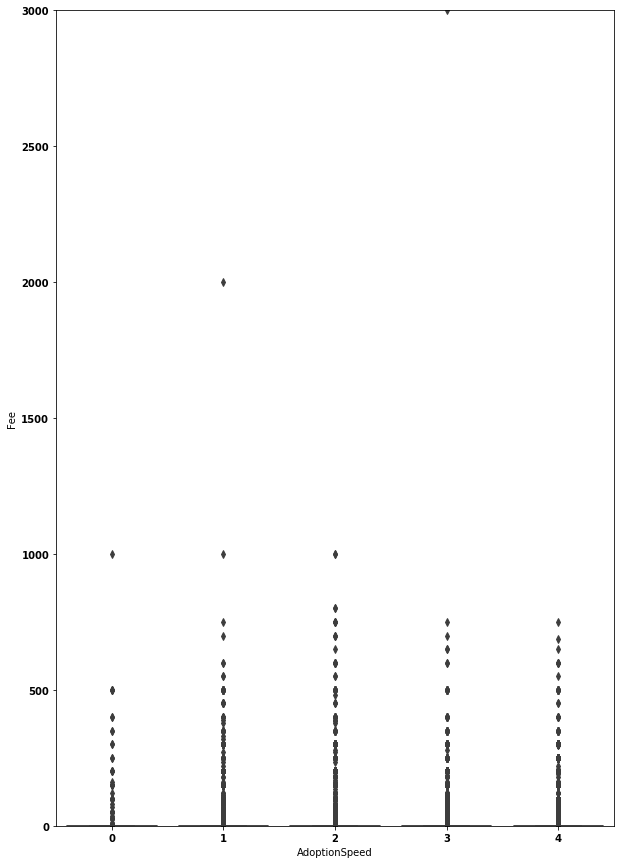

In [136]:
# FEE

plt.figure(figsize=(10,15))
plt.ylim(0, 3000)
sns.boxplot(data = df, x='AdoptionSpeed', y='Fee')

Type --> -0.09124008423430445
Age --> 0.1005099328830761
Breed1 --> 0.10783385983819059
Breed2 --> -0.018642352914443883
Gender --> 0.057621592651677385
Color1 --> -0.04419208322944416
Color2 --> -0.03857927473067995
Color3 --> -0.007014076835845136
MaturitySize --> 0.045652562021073644
FurLength --> -0.09133701350260867
Vaccinated --> -0.059042748757928115
Dewormed --> -0.01320969202659064
Sterilized --> -0.08344675516194196
Health --> 0.029381709238661388
Quantity --> 0.06293148455672994
Fee --> -0.0040167343734725455
State --> 0.013119432570419106
VideoAmt --> -0.0005714066121578725
PhotoAmt --> -0.023233124552805864
AdoptionSpeed --> 1.0


([<matplotlib.axis.XTick at 0x16fe4339358>,
 <a list of 20 Text xticklabel objects>)

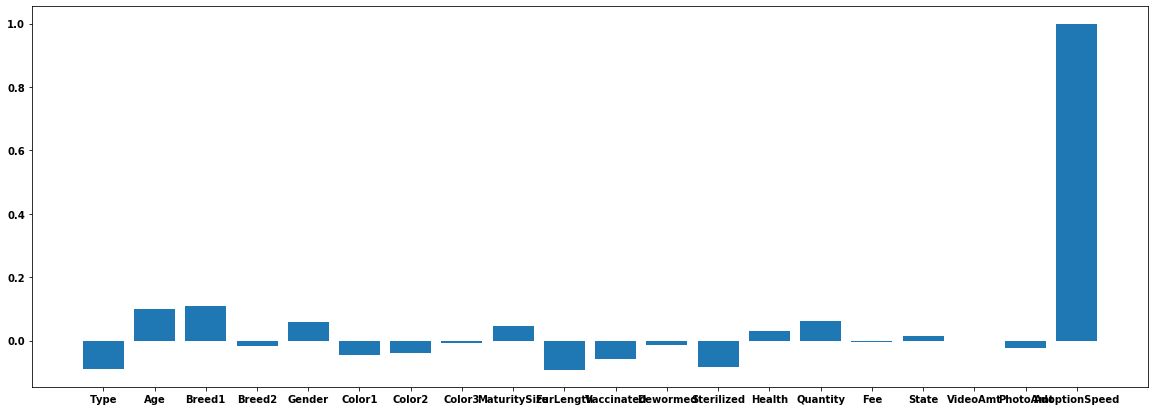

In [124]:
numeric_df = df.select_dtypes(exclude=['object'])
corr_dict = {}
for feature in numeric_df.columns:
    corr_dict[feature] = df['AdoptionSpeed'].corr(df[feature])
    print(feature, '-->', df['AdoptionSpeed'].corr(df[feature]))

plt.figure(figsize=(20,7))
plt.bar(range(len(corr_dict)), list(corr_dict.values()), align='center')
plt.xticks(range(len(corr_dict)), list(corr_dict.keys()))

In [178]:
# rescuers w/ 1+ pets

raw_df = pd.read_csv('PetFinder_dataset.csv')
rs_df = df
rID = raw_df['RescuerID'].duplicated(keep=False)
rID2 = rID * 1
rs_df['RescuerID'] = list(rID2)
rs_df['RescuerID'] = rs_df['RescuerID'].astype('category')

rs_df['RescuerID']

# unique Gender categories
#rescuer_cat = cat_distr_pairwise('AdoptionSpeed','RescuerID', rs_df)
# print("The unique categories for 'Gender' are:\n",gender_cat)

# y-axis in bold
#plt.rc('font', weight='bold')

PetID
86e1089a3    1
6296e909a    0
3422e4906    1
5842f1ff5    1
850a43f90    1
            ..
dc0935a84    1
a01ab5b30    1
d981b6395    1
e4da1c9e4    1
a83d95ead    1
Name: RescuerID, Length: 14993, dtype: category
Categories (2, int64): [0, 1]

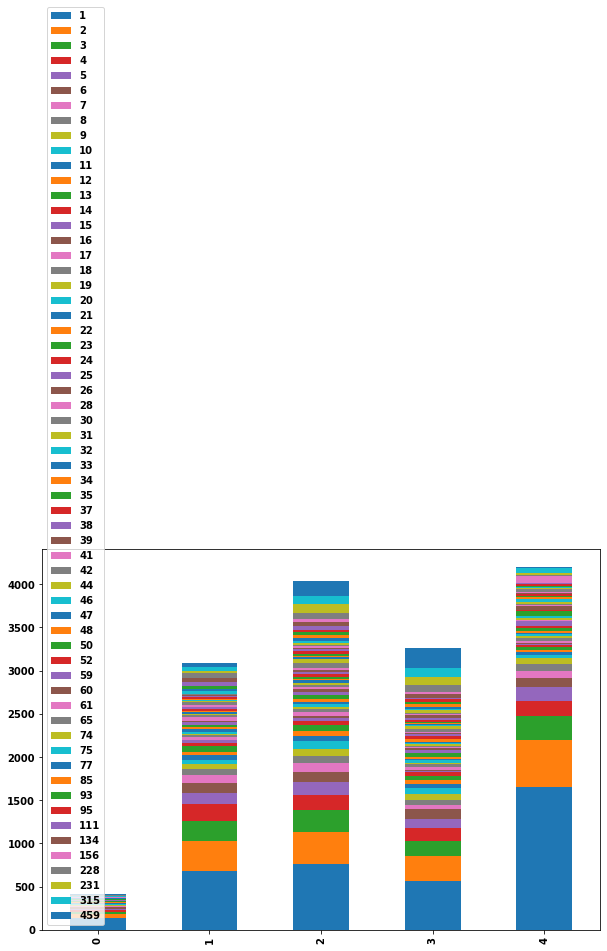

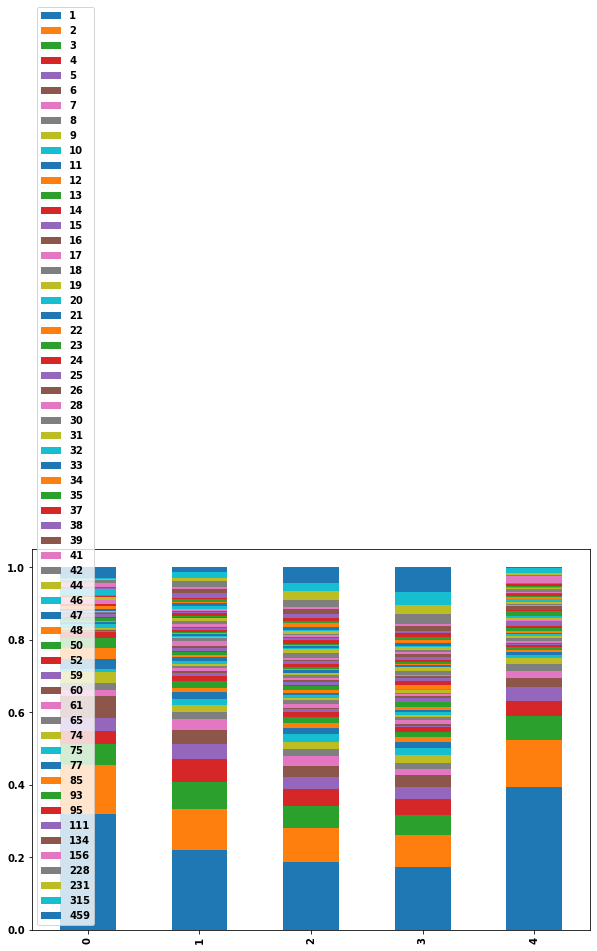

In [196]:
rs_bins_df = df    
rs_bins_df['RescuerID'] = list(raw_df['RescuerID'])
rs_bins_df

counts = raw_df['RescuerID'].value_counts()

counts
for rescuer in raw_df['RescuerID'].unique():
    rs_bins_df.loc[rs_bins_df['RescuerID'] == rescuer, 'RescuerID'] = counts[rescuer]
    
# rs_bins_df

# unique Gender categories
rescuer2_cat = cat_distr_pairwise('AdoptionSpeed','RescuerID', rs_bins_df)
# print("The unique categories for 'Gender' are:\n",gender_cat)

# y-axis in bold
plt.rc('font', weight='bold')

## Modelling